In [28]:

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


Enter an index to view:12


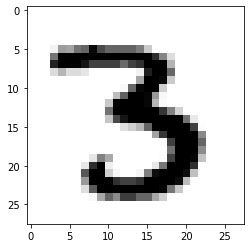

In [43]:
import matplotlib.pyplot as plt

try :
    index = eval(input('Enter an index to view:'))


    plt.imshow(train_images[index],cmap = 'gray_r')
    plt.show()
except:
    print('Invalid response!')

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
val_data = train_images[:10000]
val_label = train_labels[:10000]

In [7]:

from keras import optimizers
from keras import models
from keras import layers, regularizers
network = models.Sequential()
network.add(layers.Dense(450, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(450, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

In [8]:
import keras
class StopCallback(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.999):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
                
callbacks = StopCallback()

In [9]:
network.compile(optimizer= 'Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = network.fit(train_images, train_labels, epochs=5, batch_size=200, validation_data = [val_data,val_label])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 344us/step - loss: 0.4036 - accuracy: 0.8755 - val_loss: 0.1327 - val_accuracy: 0.9614
Epoch 2/5
60000/60000 [==============================] - 18s 300us/step - loss: 0.1735 - accuracy: 0.9482 - val_loss: 0.0857 - val_accuracy: 0.9746
Epoch 3/5
60000/60000 [==============================] - 18s 300us/step - loss: 0.1355 - accuracy: 0.9589 - val_loss: 0.0648 - val_accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 19s 310us/step - loss: 0.1134 - accuracy: 0.9653 - val_loss: 0.0479 - val_accuracy: 0.9858
Epoch 5/5
60000/60000 [==============================] - 19s 317us/step - loss: 0.0955 - accuracy: 0.9699 - val_loss: 0.0407 - val_accuracy: 0.9884


In [10]:
 test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 210us/step


In [11]:
print(test_loss, test_acc)

0.06844121536314487 0.9794999957084656


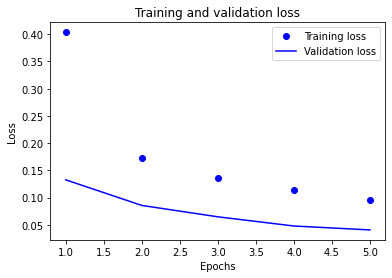

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

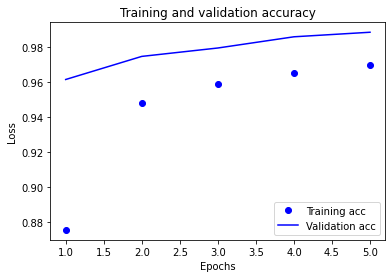

In [13]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing a rondom image

This is just a random picture...gotten from the internet


In [ ]:
import cv2 as cv
image = cv.imread('test.jpg')
cv.imshow('test.jpg', image)
cv.waitKey(0)

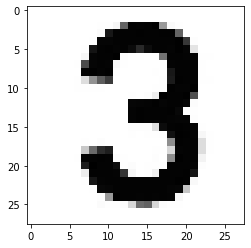

The writing is 3


In [52]:
image = cv.imread('test.jpg',cv.IMREAD_GRAYSCALE)
# image = test_images[1]
image = cv.resize(image, (28,28))

plt.imshow(image, cmap = 'Greys')
plt.show()

image = image.reshape(1,28*28)
image = image.astype('float32')/255
# image = 255-image



pred = network.predict(image)
print('The writing is',pred.argmax())